In [1]:
# Import basic liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
! pip install tensorflow

In [3]:
# Neural network related libaraies
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint

In [5]:
# Load the data
X_train = pd.read_csv('X_train_wFE.csv').drop(columns='ID', axis=1)
y_train = pd.read_csv('Y_train.csv')
X_test_initial = pd.read_csv('X_test_wFE.csv')
test_ids = X_test_initial['ID']
X_test = X_test_initial.drop(columns='ID', axis=1)

In [6]:
X_train.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_Travel', 'Travel_Class',
       'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins',
       'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering',
       'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment',
       'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service',
       'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding', 'Travel_Distance Departure_Delay_in_Mins',
       'Travel_Distance Arrival_Delay_in_Mins',
       'Departure_Delay_in_Mins Arrival_Delay_in_Mins',
       'Online_Support Ease_of_Online_Booking',
       'Online_Support Onboard_Service', 'Online_Support Online_Boarding',
       'Ease_of_Online_Booking Onboard_Service',
       'Ease_of_Online_Booking Online_Boarding',
       'Onboard_Service Online_Boarding', 'Seat_Comfort Seat_Class',
       'Seat_Comfort Legroom', 'Seat_Class Legroom',
       'Onboard_Wifi_Service Onboard_En

In [7]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 43 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Gender                                         35602 non-null  float64
 1   Customer_Type                                  35602 non-null  float64
 2   Age                                            35602 non-null  float64
 3   Type_Travel                                    35602 non-null  float64
 4   Travel_Class                                   35602 non-null  int64  
 5   Travel_Distance                                35602 non-null  int64  
 6   Departure_Delay_in_Mins                        35602 non-null  float64
 7   Arrival_Delay_in_Mins                          35602 non-null  float64
 8   Seat_Comfort                                   35602 non-null  float64
 9   Seat_Class                                     356

In [8]:
# Scale the features (fit on X_train and transform both X_train and X_test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set a random seed for NumPy and TensorFlow to ensure reproducibility
np.random.seed(42)
tf.random.set_seed(42)


# Define the model architecture
model = Sequential([
    Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Setup the ModelCheckpoint callback to save the best model
model_checkpoint = ModelCheckpoint(
    'best_model.keras',  # Specify .keras extension
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

# Train the model with validation split to monitor performance
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[model_checkpoint],  # Include the checkpoint in the callbacks
    verbose=1
)

# Load the best model saved by ModelCheckpoint
best_model = tf.keras.models.load_model('best_model.keras')

# Use the best model to make predictions on the test set
predictions = best_model.predict(X_test_scaled)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary output

Epoch 1/50
2279/2360 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - accuracy: 0.8687 - loss: 0.2995
Epoch 1: val_accuracy improved from -inf to 0.92191, saving model to best_model.keras
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 1s 309us/step - accuracy: 0.8698 - loss: 0.2972 - val_accuracy: 0.9219 - val_loss: 0.1903
Epoch 2/50
2331/2360 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - accuracy: 0.9236 - loss: 0.1811
Epoch 2: val_accuracy improved from 0.92191 to 0.93139, saving model to best_model.keras
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 1s 326us/step - accuracy: 0.9237 - loss: 0.1810 - val_accuracy: 0.9314 - val_loss: 0.1698
Epoch 3/50
2328/2360 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - accuracy: 0.9325 - loss: 0.1590
Epoch 3: val_accuracy improved from 0.93139 to 0.93537, saving model to best_model.keras
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 1s 330us/step - accuracy: 0.9325 - loss: 0.1589 - val_accuracy: 0.9354 - val_loss: 0.1574
Epoch 4/50
2260/2360 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - accuracy: 0.9374 - loss: 0.1461
Epoch 4: val_

2190/2360 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step - accuracy: 0.9581 - loss: 0.0975
Epoch 24: val_accuracy did not improve from 0.94676
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 1s 297us/step - accuracy: 0.9581 - loss: 0.0974 - val_accuracy: 0.9452 - val_loss: 0.1364
Epoch 25/50
2240/2360 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - accuracy: 0.9583 - loss: 0.0974
Epoch 25: val_accuracy did not improve from 0.94676
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 1s 292us/step - accuracy: 0.9583 - loss: 0.0973 - val_accuracy: 0.9461 - val_loss: 0.1369
Epoch 26/50
2206/2360 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - accuracy: 0.9580 - loss: 0.0966
Epoch 26: val_accuracy improved from 0.94676 to 0.94697, saving model to best_model.keras
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 1s 298us/step - accuracy: 0.9580 - loss: 0.0965 - val_accuracy: 0.9470 - val_loss: 0.1364
Epoch 27/50
2200/2360 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - accuracy: 0.9580 - loss: 0.0958
Epoch 27: val_accuracy did not improve from 0.94697
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 1s 295us

Epoch 49/50
2248/2360 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - accuracy: 0.9639 - loss: 0.0830
Epoch 49: val_accuracy did not improve from 0.94697
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 1s 290us/step - accuracy: 0.9639 - loss: 0.0831 - val_accuracy: 0.9462 - val_loss: 0.1510
Epoch 50/50
2219/2360 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step - accuracy: 0.9647 - loss: 0.0831
Epoch 50: val_accuracy did not improve from 0.94697
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 1s 294us/step - accuracy: 0.9646 - loss: 0.0831 - val_accuracy: 0.9463 - val_loss: 0.1474
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 0s 190us/step


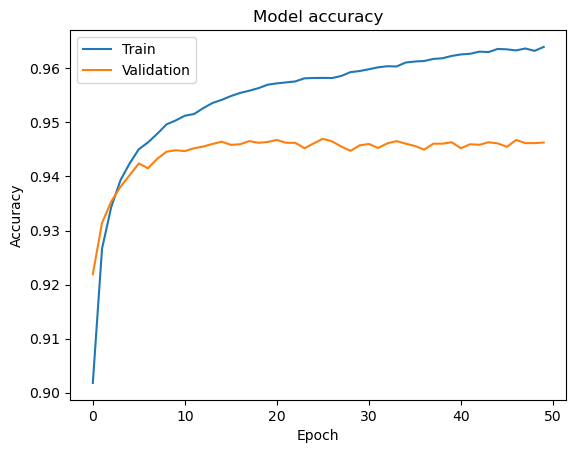

In [9]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [13]:
# Predict the result
predictions = model.predict(X_test_scaled)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary output

# Combine IDs with predictions for a submission
results_df = pd.DataFrame({
    'ID': test_ids,
    'Overall_Experience': predictions.ravel()  # Adjust based on your model output structure
})

# Save or return results
results_df.to_csv('submisson3.csv', index=False)

1113/1113 ━━━━━━━━━━━━━━━━━━━━ 0s 191us/step


In [14]:
results_df

,ID,Overall_Experience
0,99900001,1
1,99900002,1
2,99900003,1
3,99900004,0
4,99900005,1
...,...,...
35597,99935598,0
35598,99935599,1
35599,99935600,0
35600,99935601,1


In [15]:
X_test_initial.shape

(35602, 44)

## Hyperparameter Tuning

In [25]:
!pip install keras-tuner

  Obtaining dependency information for keras-tuner from https://files.pythonhosted.org/packages/db/5d/945296512980b0827e93418514c8be9236baa6f0a1e8ca8be3a2026665b0/keras_tuner-1.4.7-py3-none-any.whl.metadata
  Obtaining dependency information for kt-legacy from https://files.pythonhosted.org/packages/16/53/aca9f36da2516db008017db85a1f3cafaee0efc5fc7a25d94c909651792f/kt_legacy-1.0.5-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.6 MB/s eta 0:00:00a 0:00:01


In [16]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

class MyHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape
    
    def build(self, hp):
        model = keras.Sequential()
        model.add(layers.InputLayer(input_shape=self.input_shape))
        
        # Tune the number of layers, now allowing up to 5 dense layers
        for i in range(hp.Int('num_layers', 1, 5)): 
            model.add(layers.Dense(
                units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                activation=hp.Choice('activation_' + str(i), values=['relu', 'tanh', 'sigmoid'])
            ))
        
        model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification
        
        # Compile model
        model.compile(
            optimizer=keras.optimizers.Adam(
                hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
            loss='binary_crossentropy',
            metrics=['accuracy']
        )
        return model

# Assuming X_train_scaled and y_train are already defined
input_shape = (X_train_scaled.shape[1],)

hypermodel = MyHyperModel(input_shape=input_shape)

# Initialize the tuner
tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=6,  # Set a reasonable number of trials to find the best hyperparameters
    executions_per_trial=2,
    directory='my_dir_FE',  # Directory to store logs
    project_name='keras_tuner_demo_FE'
)

# Start tuning
tuner.search(X_train_scaled, y_train, epochs=10, validation_split=0.2, verbose=1)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The best number of layers: {best_hps.get('num_layers')}
The best number of units per layer: {[best_hps.get('units_' + str(i)) for i in range(best_hps.get('num_layers'))]}
The best activations per layer: {[best_hps.get('activation_' + str(i)) for i in range(best_hps.get('num_layers'))]}
The best learning rate for the optimizer: {best_hps.get('learning_rate')}
""")


Trial 6 Complete [00h 01m 26s]
val_accuracy: 0.9410362243652344

Best val_accuracy So Far: 0.9483735859394073
Total elapsed time: 00h 03m 52s

The best number of layers: 4
The best number of units per layer: [192, 288, 128, 416]
The best activations per layer: ['tanh', 'relu', 'tanh', 'sigmoid']
The best learning rate for the optimizer: 0.000976698895553929



### Optimized Model 

In [17]:
# Set a random seed for NumPy and TensorFlow to ensure reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define the optimized model architecture based on hyperparameter tuning results
model_optimized = Sequential([
    Dense(192, input_shape=(X_train_scaled.shape[1],), activation='tanh'),  # First optimized layer
    Dense(288, activation='relu'),  # Second optimized layer
    Dense(128, activation='tanh'),  # Third optimized layer
    Dense(416, activation='sigmoid'),  # Fourth optimized layer
    Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model with the optimized learning rate
model_optimized.compile(optimizer=Adam(learning_rate=0.000589358031504996), loss='binary_crossentropy', metrics=['accuracy'])

# Setup the ModelCheckpoint callback to save the best model
model_checkpoint_optimized = ModelCheckpoint(
    'best_model_optimized.keras',  # Specify .keras extension
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

# Train the model with validation split to monitor performance
history_optimized = model_optimized.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,  # Consider adjusting based on performance and overfitting
    batch_size=32,  # Batch size remains as per the base setup
    callbacks=[model_checkpoint_optimized],  # Include the checkpoint in the callbacks
    verbose=1
)

# Load the best model saved by ModelCheckpoint
best_model_optimized = tf.keras.models.load_model('best_model_optimized.keras')

# Use the best model to make predictions on the test set
predictions_optimized = best_model_optimized.predict(X_test_scaled)
predictions_optimized = (predictions_optimized > 0.5).astype(int)  # Convert probabilities to binary output


Epoch 1/50
2324/2360 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8898 - loss: 0.2610
Epoch 1: val_accuracy improved from -inf to 0.92276, saving model to best_model_optimized.keras
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8902 - loss: 0.2603 - val_accuracy: 0.9228 - val_loss: 0.1877
Epoch 2/50
2338/2360 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.9315 - loss: 0.1648
Epoch 2: val_accuracy improved from 0.92276 to 0.93563, saving model to best_model_optimized.keras
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9316 - loss: 0.1647 - val_accuracy: 0.9356 - val_loss: 0.1589
Epoch 3/50
2356/2360 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9415 - loss: 0.1382
Epoch 3: val_accuracy improved from 0.93563 to 0.94067, saving model to best_model_optimized.keras
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9415 - loss: 0.1382 - val_accuracy: 0.9407 - val_loss: 0.1435
Epoch 4/50
2323/2360 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.9453 - loss: 

Epoch 25/50
2320/2360 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - accuracy: 0.9767 - loss: 0.0520
Epoch 25: val_accuracy did not improve from 0.94972
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9768 - loss: 0.0520 - val_accuracy: 0.9491 - val_loss: 0.2042
Epoch 26/50
2350/2360 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9776 - loss: 0.0495
Epoch 26: val_accuracy did not improve from 0.94972
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9776 - loss: 0.0495 - val_accuracy: 0.9481 - val_loss: 0.2097
Epoch 27/50
2336/2360 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.9793 - loss: 0.0474
Epoch 27: val_accuracy did not improve from 0.94972
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9793 - loss: 0.0474 - val_accuracy: 0.9486 - val_loss: 0.2158
Epoch 28/50
2333/2360 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.9802 - loss: 0.0455
Epoch 28: val_accuracy did not improve from 0.94972
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9802 - loss: 0.0

Epoch 50/50
2351/2360 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.9902 - loss: 0.0256
Epoch 50: val_accuracy did not improve from 0.94972
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9902 - loss: 0.0256 - val_accuracy: 0.9459 - val_loss: 0.2644
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step


In [18]:
# Combine IDs with predictions for a submission
results_df_optimized = pd.DataFrame({
    'ID': test_ids,
    'Overall_Experience': predictions_optimized.ravel()  # Adjust based on your model output structure
})

# Save or return results
results_df_optimized.to_csv('submisson4.csv', index=False)